# Data pre-processing

In [1]:
%matplotlib inline

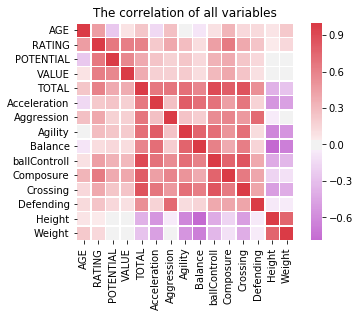

In [2]:
#Runhao Zhao (rz6dg) Wenxi Zhao (wz8nx) Shaoran Li (sl4bz) Winfred Zhao (whh3rz) Jingnan Yang (jy4fch)
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.reset_orig()
import matplotlib.pyplot as plt
import numpy as np
#read all csv files
data1=pd.read_csv("fifa.csv",encoding="latin-1")
data2=pd.read_csv("acceleration.csv",encoding="latin-1")
data3=pd.read_csv("aggression.csv",encoding="latin-1")
data4=pd.read_csv("agility.csv",encoding="latin-1")
data5=pd.read_csv("balance.csv",encoding="latin-1")
data6=pd.read_csv("ballControll.csv",encoding="latin-1")
data7=pd.read_csv("composure.csv",encoding="latin-1")
data8=pd.read_csv("Crossing.csv",encoding="latin-1")
data9=pd.read_csv("defending.csv",encoding="latin-1")
data10=pd.read_csv("height.csv",encoding="latin-1")
data11=pd.read_csv("Weight.csv",encoding="latin-1")
data12=pd.read_csv("position.csv",encoding="latin-1")
data13=pd.read_csv("team.csv",encoding="latin-1")
#concatenate all dataframes into one
data=pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data13,data12],axis=1)
#remove uneccessary characters in the dataset
data["position"]=data["position"].str.replace("[","")
data["position"]=data["position"].str.replace("\'","")
data["position"]=data["position"].str.replace("]","")
data["position"]=data["position"].str.strip()
data["WAGE"]=data["WAGE"].str.replace("$","")
data["WAGE"]=data["WAGE"].str.replace("K","")
data["VALUE"]=data["VALUE"].str.replace("$","")
data["VALUE"]=data["VALUE"].str.replace("M","")
data["Height"]=data["Height"].str.replace("cm","")
data["Weight"]=data["Weight"].str.replace("kg","")
a=data.VALUE.str.contains("K")#store the index
#unify all units
if data.VALUE.str.contains("K").any():
    data["VALUE"]=pd.to_numeric(data["VALUE"].str.replace("K",""))
data.loc[a,"VALUE"]=data.loc[a,"VALUE"]/1000
data.drop_duplicates(subset=["NAME"],keep="first",inplace=True)
#drop all "unnamed columns"
data=data.loc[:, ~data.columns.str.contains('^Unnamed')]
#remove duplicates from the dataset
data.reset_index(drop=True,inplace=True)
#remove commas 
data["position"]=data.position.str.replace("," ,"")

data["Height"]=pd.to_numeric(data["Height"])
data["Weight"]=pd.to_numeric(data["Weight"])
#output the dataset to a csv file
# data.to_csv("dataForAnalysis2.csv",encoding="latin-1")
#replae missing values with the average wage
data.WAGE.loc[(data==0).any(axis=1)]=data.WAGE.mean()
#generate a custom diverging colormap
cmap = sns.diverging_palette(300, 10, as_cmap=True)
corr=data.corr()
sns.heatmap(corr,  cmap=cmap,vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})
plt.title("The correlation of all variables")           
plt.show()

#create a function to split wage into several categories 
def Wage(n):
    a=""
    if n<=700 and n>600:
        a="600K-700K"
    if n<=600 and n>500:
        a="500K-600K"
    if n<=500 and n>400:
        a="400K-500K"
    if n<=400 and n>300:
        a="300K-400K"
    if n<=300 and n>200:
        a="200K-300K"
    if n<=200 and n>100:
        a="100K-200K"
    if n<=100:
        a="<100K"
    return(a)
data["WAGE"]=pd.to_numeric(data["WAGE"])
#apply Wage function to the wage column and append the result to a new column
data["wageCat"]=data["WAGE"].map(Wage)

# Initial Data Exploratory analysis

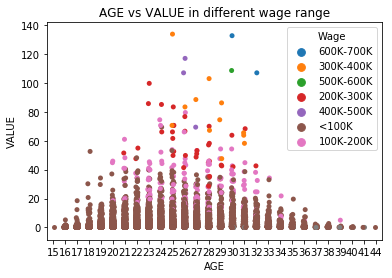

In [3]:
#create a scatter plot for age and value
fig, ax = plt.subplots()
sns.stripplot(x=data["AGE"],y=data["VALUE"],hue=data["wageCat"])
ax.legend().set_title("Wage")
plt.title("AGE vs VALUE in different wage range")
plt.show()

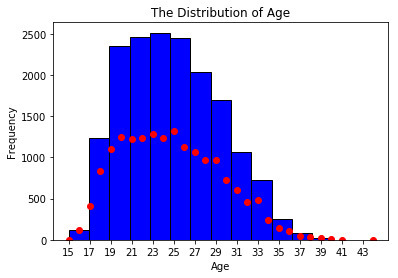

In [4]:
#create a histogram for the distribution of age
plt.hist(data["AGE"], bins=15,edgecolor='black',facecolor='blue')
plt.xticks(np.arange(15, 45, 2))
plt.plot(data.AGE.value_counts(),"o",color="red")
plt.title("The Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [5]:
#split the position into multiple columns
positionDf=data.position.str.split(" ",expand=True)
positionDf.columns=["position1","position2","position3","position4"]
newData=pd.concat([data,positionDf],axis=1)
newData=newData.drop(["position"],axis=1)
newData.columns

Index(['NAME', 'AGE', 'RATING', 'WAGE', 'POTENTIAL', 'VALUE', 'TOTAL',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'ballControll',
       'Composure', 'Crossing', 'Defending', 'Height', 'Weight', 'Nationality',
       'wageCat', 'position1', 'position2', 'position3', 'position4'],
      dtype='object')

In [6]:
#subset the data set that only contains rating and nationality
nationality=data[["RATING","Nationality"]]
#group by nationality and calculate the mean for each country
groupby=nationality.groupby(["Nationality"])["RATING"].mean()
groupby=pd.DataFrame(groupby)
#reset the index
groupby.reset_index(level=0,inplace=True)
groupby.Nationality[1]

'Albania'

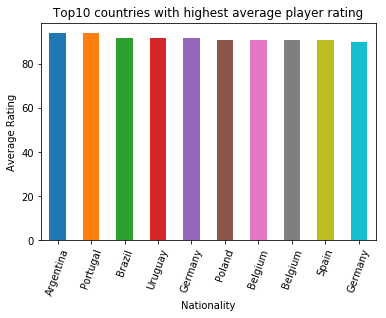

In [7]:
#sort the data set by rating
sorted1=data.sort_values(["RATING"],ascending=False)
sorted1[:10].plot.bar("Nationality","RATING",legend=None)
plt.title("Top10 countries with highest average player rating")
plt.ylabel("Average Rating")
plt.xticks(rotation=70)
plt.show()

In [8]:
#since these countries are not common soccer-strong countries
top10Country=sorted1.Nationality[:10]

In [9]:
top10Country=list(top10Country)

In [10]:

nationality=data[["RATING","Nationality"]]
players=nationality.loc[nationality["Nationality"].isin(top10Country)]
players["Nationality"]=players["Nationality"].astype('category')
players.Nationality[1]


'Portugal'

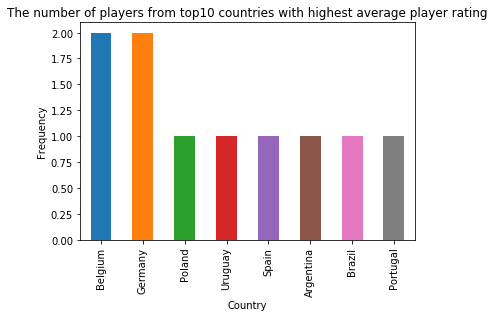

In [11]:
#plot the number of players in the countries above
nationality=data[["RATING","Nationality"]]
sorted1[:10]["Nationality"].value_counts().plot(kind="bar")
plt.ylabel("Frequency")
plt.xlabel("Country")
plt.title("The number of players from top10 countries with highest average player rating")
plt.show()

In [12]:
#count the frequency
tem=nationality["Nationality"].value_counts()

In [13]:
#sort the df by the number of players
tem=pd.DataFrame(tem.sort_index(ascending=True))
tem.reset_index(level=0,inplace=True)
tem.columns=["Country","numOfPlayers"]

In [14]:
#concatenate two data frames
tem2=pd.concat([groupby,tem["numOfPlayers"]],axis=1)

In [15]:
total=tem2.numOfPlayers.sum()

In [16]:
tem2["Percent"]=tem2["numOfPlayers"]/17000

In [17]:
#calculate the weighted rating
tem2["newRating"]=tem2["RATING"]*tem2["Percent"]

In [18]:
#sort the dataset by newRating
tem2=tem2.sort_values(["newRating"],ascending=False)


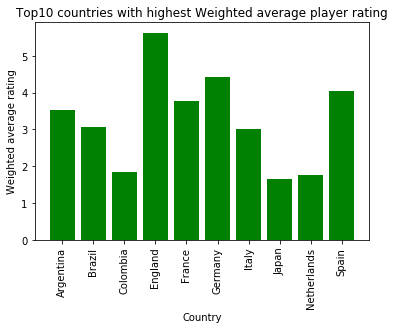

In [19]:
plt.bar(tem2["Nationality"][:10],tem2["newRating"][:10],color="green")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Weighted average rating")
plt.title("Top10 countries with highest Weighted average player rating")
plt.show()

In [20]:
top10Player=data[["NAME","RATING"]].sort_values(["RATING"],ascending=False)

In [21]:
#top10 players with highest rating
top10Player[:10]

,NAME,RATING
0,L. Messi,94
1,Cristiano Ronaldo,94
2,Neymar,92
3,L. SuÃ¡rez,92
4,M. Neuer,92
7,R. Lewandowski,91
8,E. Hazard,91
6,K. De Bruyne,91
5,De Gea,91
9,T. Kroos,90


In [22]:
h_agility=data[["Height","Weight","Agility"]]

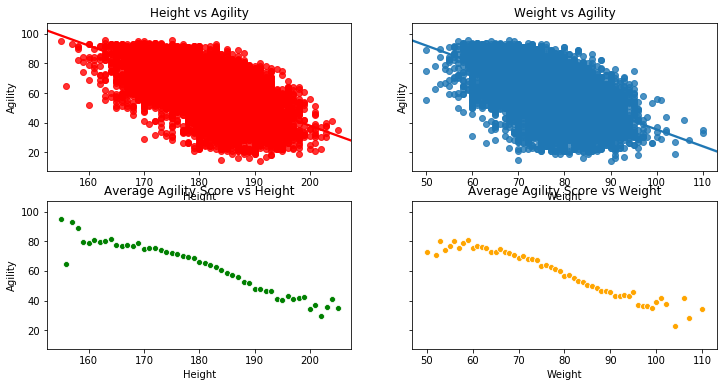

In [23]:
#create two subplots
fig, [(ax1,ax2),(ax3,ax4)] = plt.subplots(2, 2,figsize=(12,6),sharey=True)

#create a scatterplot 
sns.regplot(h_agility["Height"],h_agility["Agility"],color="red",ax=ax1)
sns.regplot(h_agility["Weight"],h_agility["Agility"],ax=ax2)
ax1.set_title("Height vs Agility")
ax2.set_title("Weight vs Agility")
avgAgility1=pd.DataFrame(h_agility.groupby(["Height"])["Agility"].mean())
#scatter plot for average agility score and height
sns.scatterplot(avgAgility1.index,avgAgility1["Agility"],ax=ax3,color="green")
avgAgility2=pd.DataFrame(h_agility.groupby(["Weight"])["Agility"].mean())
sns.scatterplot(avgAgility2.index,avgAgility2["Agility"],ax=ax4,color="orange")
ax3.set_title("Average Agility Score vs Height")
ax4.set_title("Average Agility Score vs Weight")
plt.show()
fig.tight_layout()

In [24]:
#select the first position as player's preferred positon
DEF = ["LWB", "LB", "CB", "RB", "RWB"]
MID = ["LW","LM","CDM","CM","CAM","RM","RW"]
FWD = ["CF","ST"]
#create a function to classify these postions into more general postions
def position(n):
    if n  == "GK":
        return "GK"
    if n in DEF:
        return "DEF"
    if n in MID:
        return "MID"
    if n in FWD:
        return "FWD"
newData["preferredPosition"]=newData["position1"].map(position)


In [25]:
#count the frequency of each position
prePostion=pd.DataFrame(newData["preferredPosition"].value_counts())

Text(0.5,0,'Preferred Position')

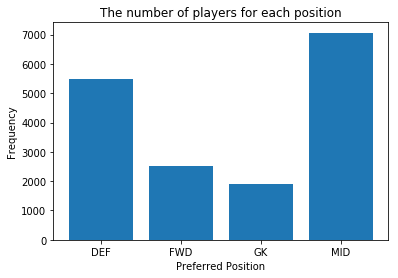

In [26]:
plt.bar(prePostion.index,prePostion["preferredPosition"])
plt.title("The number of players for each position")
plt.ylabel("Frequency")
plt.xlabel("Preferred Position")

Text(0.5,1,'Value vs Preferred Position based on wage')

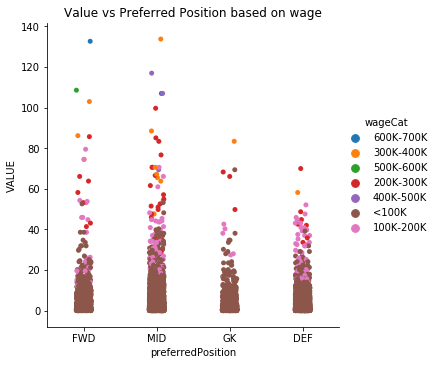

In [27]:
sns.catplot(x="preferredPosition",y="VALUE",hue="wageCat",data=newData)
plt.title("Value vs Preferred Position based on wage")

In [28]:
#get the data set contains player value and preferred Postion
value_postion=newData[["VALUE","preferredPosition"]]
#get the data set contains player wage and preferred Postion
wage_postion=newData[["WAGE","preferredPosition"]]

In [29]:
#group by preferred postion and get average value
Avg_Value_Position=pd.DataFrame(value_postion.groupby(["preferredPosition"])["VALUE"].mean())
#group by preferred postion and get average value
Avg_wage_Position=pd.DataFrame(wage_postion.groupby(["preferredPosition"])["WAGE"].mean())

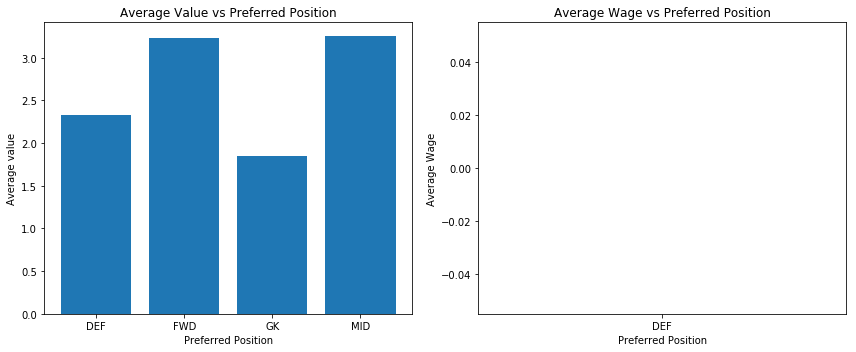

In [30]:
#bar plot for average value and preferred position
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
ax1.bar(Avg_Value_Position.index,Avg_Value_Position.VALUE)
ax1.set_title("Average Value vs Preferred Position")
ax1.set_xlabel("Preferred Position")
ax1.set_ylabel("Average value")
#bar plot for average wage and preferred position
ax2.bar(Avg_wage_Position.index,Avg_wage_Position.WAGE)
ax2.set_title("Average Wage vs Preferred Position")
ax2.set_xlabel("Preferred Position")
ax2.set_ylabel("Average Wage")
plt.tight_layout()

# Modeling Technique

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Linear Regression

In [32]:
#extract the data contains several attributes needed for prediction
subset = data[["POTENTIAL","VALUE","Aggression","Composure","Defending","Crossing"]]
subset_rating = data["RATING"]
#split the data into trainning and testing data set
X_train, X_test, y_train, y_test = train_test_split(subset, subset_rating, random_state=0)
lm = LinearRegression()
#cross valiadation
cross_score = cross_val_score(lm, X_train, y_train, scoring="neg_mean_squared_error",cv=10)

In [39]:
#cross validation score
-cross_score

array([16.0466697 , 15.56813058, 16.27584461, 16.54836753, 15.7140521 ,
       17.35404871, 15.2558863 , 17.66432905, 15.86016618, 17.0871606 ])

In [40]:
#create a linear regression on the training data
model=lm.fit(X_train, y_train)

In [41]:
#prediction
prediction = lm.predict(X_test)

Text(0,0.5,'Prediction')

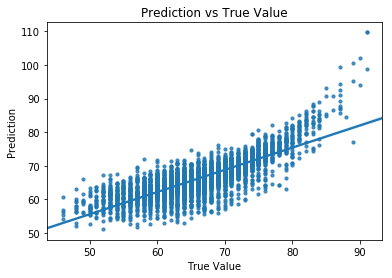

In [42]:
#plot the prediction and true values
sns.regplot(y_test, prediction, scatter_kws={"s": 10}, y_jitter=.5)
plt.title("Prediction vs True Value")
plt.xlabel("True Value")
plt.ylabel("Prediction")

In [43]:
from sklearn.metrics import r2_score
y_test=np.array(y_test).reshape(-1,1)
prediction=prediction.reshape(-1,1)
#r squred
r2_score(y_test, prediction)

0.6535453722070389

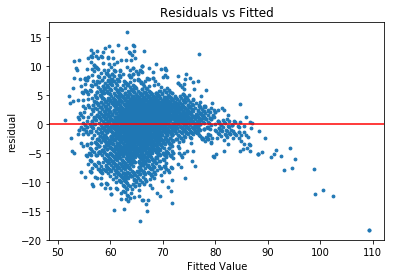

array([16.0466697 , 15.56813058, 16.27584461, 16.54836753, 15.7140521 ,
       17.35404871, 15.2558863 , 17.66432905, 15.86016618, 17.0871606 ])

In [44]:
#plot out residuals
residual =pd.DataFrame(y_test)-pd.DataFrame(prediction)
plt.scatter(pd.DataFrame(prediction),residual,s=8)
plt.axhline(y=0,color="red")
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted Value")
plt.ylabel("residual")
plt.show()
-cross_score

Lasso Regression

In [45]:
from sklearn import linear_model

In [46]:
#try with lasso regression 
clf = linear_model.Lasso(alpha=0.1)

In [47]:
#create the regression model
model2 = clf.fit(X_train, y_train)
#cross validation
cross_score2 = cross_val_score(clf, X_train, y_train, scoring="neg_mean_squared_error",cv=10)
-cross_score2

array([16.04901087, 15.57391569, 16.27867852, 16.54111776, 15.70975576,
       17.35737566, 15.26607173, 17.646808  , 15.86348078, 17.08975655])

In [48]:
prediction2 = clf.predict(X_test)
prediction2=prediction2.reshape(-1,1)
#r squred
r2_score(y_test, prediction2)


0.6534697923118156

Decision Tree

In [49]:
#predict overall rating using decision tree
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=8)
#create a decison tree model based on the trainning data set 
model3 = regr_1.fit(X_train, y_train)
#cross validation
cross_score3 = cross_val_score(regr_1, X_train, y_train, scoring="neg_mean_squared_error",cv=10)

Text(0,0.5,'Prediction')

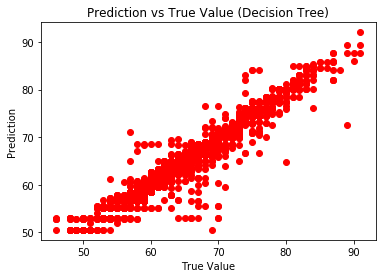

In [50]:
#prediction
prediction3 = regr_1.predict(X_test)
#create a scatterplot
plt.scatter(y_test, prediction3, color="red")
plt.title("Prediction vs True Value (Decision Tree)")
plt.xlabel("True Value")
plt.ylabel("Prediction")

In [51]:
#R squared
r2_score(y_test, prediction3)

0.9370542837347287

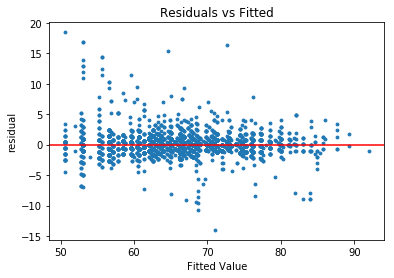

array([2.79569618, 2.57937916, 2.28705037, 2.95297832, 2.86956702,
       2.60314822, 2.82541959, 3.10277697, 2.09901873, 3.24833267])

In [52]:
#plot out residuals
residual2 =pd.DataFrame(y_test)-pd.DataFrame(prediction3)
plt.scatter(pd.DataFrame(prediction3),residual2,s=8)
plt.axhline(y=0,color="red")
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted Value")
plt.ylabel("residual")
plt.show()
-cross_score3